In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
path ="E:\\study\\sugyeong_github\\Movement-motion_classification-AI\\data"
os.chdir(path)
train = pd.read_csv('train_features.csv')
train_labels = pd.read_csv('train_labels.csv')
test = pd.read_csv('test_features.csv')
submission = pd.read_csv('sample_submission.csv')

In [3]:
# id 별로 600개의 time별 data 가 있음
train['id'].value_counts()

0       600
2731    600
2722    600
675     600
1699    600
       ... 
2379    600
1354    600
2378    600
331     600
2047    600
Name: id, Length: 3125, dtype: int64

In [4]:
# train_labels.csv에서 id가 수행한 동작과 그에 따른 label 값을 확인
train_labels

,id,label,label_desc
0,0,37,Shoulder Press (dumbbell)
1,1,26,Non-Exercise
2,2,3,Biceps Curl (band)
3,3,26,Non-Exercise
4,4,26,Non-Exercise
...,...,...,...
3120,3120,26,Non-Exercise
3121,3121,26,Non-Exercise
3122,3122,15,Dynamic Stretch (at your own pace)
3123,3123,26,Non-Exercise


<AxesSubplot:>

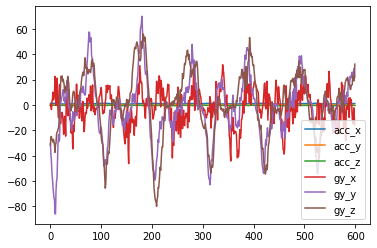

In [5]:
# id 별 동작 흐름
ex = train[train['id'] == 0]
ex.iloc[:,2:].plot()

<AxesSubplot:>

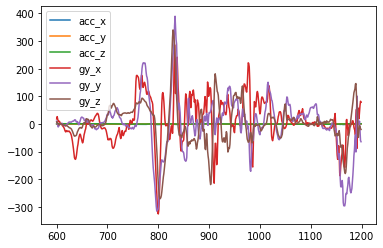

In [6]:
ex=train[train['id']==1]
ex.iloc[:,2:].plot()

In [7]:
#test'id'는 782개 
test['id'].nunique()

782

In [8]:
#782개의 id 별 동작 데이터를 활용해 각각의id가 어떤 동작인지를 분류하는 문제!!
submission

,id,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,60
0,3125,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3126,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3127,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3128,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3129,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
778,3903,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
779,3904,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
780,3905,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

## 데이터 전처리(reshape, one-hot encoding)

In [10]:
train.shape

(1875000, 8)

In [11]:
# id랑 time label을 없앰
X=tf.reshape(np.array(train.iloc[:,2:]),[-1, 600, 6]) # acc_x, acc_y, acc_z, gy_x, gy_y, gy_z
X.shape #(3125,600,6) > 데이터1개 = id1개당 600time의 동작데이터

TensorShape([3125, 600, 6])

In [12]:
len(train_labels['label'].unique())

61

In [39]:
# label을 one-hot encoding (61개의 unique 한 label 존재)
y = tf.keras.utils.to_categorical(train_labels['label']) 
y=tf.convert_to_tensor(y)
y.shape

TensorShape([3125, 61])

In [14]:
len(train_labels['label'].unique())

61

In [15]:
import tensorflow as tf
tf.__version__

'2.0.0'

## 모델 학습 및 예측

In [16]:
#가벼운 모델 생성
model = Sequential()
model.add(LSTM(32, input_shape=(600,6)))
model.add(Dense(128, activation='relu'))
model.add(Dense(61, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [138]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, GRU, Bidirectional, Conv1D, MaxPooling1D, SpatialDropout1D
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping

def deep_gru():
    model = Sequential()
    model.add(Bidirectional(GRU(32, input_shape = (600,6), return_sequences = True)))
    model.add(Bidirectional(GRU(64, return_sequences = True)))
    model.add(Bidirectional(GRU(64, return_sequences = True)))   
    model.add(Bidirectional(GRU(128, return_sequences = False)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(61, activation='softmax'))
    
    #adam = optimizers.adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
    return model

def deep_lstm():
    model = Sequential()
    model.add(LSTM(32, input_shape = (600,6), return_sequences = True))
    model.add(LSTM(64, return_sequences = True))
    model.add(LSTM(64, return_sequences = True))
    model.add(LSTM(128, return_sequences = False))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(61, activation='softmax'))
    
    #adam = optimizers.adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
    return model

def cnn_lstm():
    model = Sequential()
#     model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
#     model.add(MaxPooling1D(pool_size=2))
#     model.add(SpatialDropout1D(0.4))
    model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(SpatialDropout1D(0.4))
    model.add(Bidirectional(LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=False)))
    #model.add(LSTM(100))
    model.add(Dense(61, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                      optimizer='rmsprop',
                      metrics = ['accuracy'])
    return model

In [23]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [26]:
model1 = deep_lstm()
model1.fit(X,y, epochs=100, batch_size=32, validation_split=0.2,callbacks=[es])

Train on 2500 samples, validate on 625 samples
Epoch 1/100


Exception ignored in: <function ScopedTFGraph.__del__ at 0x000001A1409FC5E8>
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\envs\spoofing\lib\site-packages\tensorflow_core\python\framework\c_api_util.py", line 51, in __del__
    if c_api is not None and c_api.TF_DeleteGraph is not None:
KeyboardInterrupt


 416/2500 [===>..........................] - ETA: 38s - loss: 3.0859 - accuracy: 0.4557WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


KeyboardInterrupt: 

In [51]:
model2 = deep_gru()
print(type(y))
model2.fit(X,y, epochs=100, batch_size=32, validation_split=0.2,callbacks=[es])

<class 'tensorflow.python.framework.ops.EagerTensor'>
Train on 2500 samples, validate on 625 samples
Epoch 1/100
2500/2500 [==============================] - 44s 18ms/sample - loss: 2.8492 - accuracy: 0.4740 - val_loss: 2.6427 - val_accuracy: 0.4976
Epoch 2/100
2500/2500 [==============================] - 28s 11ms/sample - loss: 2.4093 - accuracy: 0.5032 - val_loss: 2.3109 - val_accuracy: 0.5232
Epoch 3/100
2500/2500 [==============================] - 28s 11ms/sample - loss: 2.0648 - accuracy: 0.5264 - val_loss: 2.2018 - val_accuracy: 0.5360
Epoch 4/100
2500/2500 [==============================] - 28s 11ms/sample - loss: 1.7857 - accuracy: 0.5604 - val_loss: 2.0071 - val_accuracy: 0.5504
Epoch 5/100
2500/2500 [==============================] - 27s 11ms/sample - loss: 1.5323 - accuracy: 0.5920 - val_loss: 1.8975 - val_accuracy: 0.5680
Epoch 6/100
2500/2500 [==============================] - 27s 11ms/sample - loss: 1.3003 - accuracy: 0.6416 - val_loss: 1.8763 - val_accuracy: 0.5360
Epoch

In [ ]:
model=cnn_lstm()
model.fit(X,y, epochs=1000, batch_size=32, validation_split=0.2,callbacks=[es])

Train on 2500 samples, validate on 625 samples
Epoch 1/1000
2500/2500 [==============================] - 92s 37ms/sample - loss: 2.9001 - accuracy: 0.4644 - val_loss: 2.7075 - val_accuracy: 0.4976
Epoch 2/1000
2500/2500 [==============================] - 84s 34ms/sample - loss: 2.7023 - accuracy: 0.4884 - val_loss: 2.5543 - val_accuracy: 0.5184
Epoch 3/1000
2500/2500 [==============================] - 85s 34ms/sample - loss: 2.5816 - accuracy: 0.5032 - val_loss: 2.4611 - val_accuracy: 0.5184
Epoch 4/1000
2500/2500 [==============================] - 84s 34ms/sample - loss: 2.4958 - accuracy: 0.5044 - val_loss: 2.4149 - val_accuracy: 0.5200
Epoch 5/1000
2500/2500 [==============================] - 85s 34ms/sample - loss: 2.4544 - accuracy: 0.5044 - val_loss: 2.2611 - val_accuracy: 0.5232
Epoch 6/1000
2500/2500 [==============================] - 85s 34ms/sample - loss: 2.3605 - accuracy: 0.5068 - val_loss: 2.2626 - val_accuracy: 0.5248
Epoch 7/1000
2500/2500 [=============================

## evaluate

In [131]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
test_X.shape

TensorShape([782, 600, 6])

In [132]:
prediction=model.predict(test_X)

In [133]:
prediction.shape

(782, 61)

In [134]:
submission

,id,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,60
0,3125,0.000594,1.033038e-06,1.082854e-03,0.003882,2.777112e-05,0.000141,1.379501e-09,0.000080,0.000142,...,0.021051,6.340692e-06,2.930457e-02,1.962430e-03,0.002513,1.657866e-05,0.002220,3.450327e-03,1.627051e-07,0.000170
1,3126,0.000207,5.358250e-06,7.826875e-05,0.001173,1.175244e-05,0.003552,1.015210e-09,0.003319,0.000258,...,0.000477,8.709583e-06,9.212533e-06,8.302033e-05,0.001011,2.921589e-05,0.000911,5.174235e-05,1.440658e-06,0.003167
2,3127,0.000175,2.178872e-02,3.403511e-04,0.000978,4.136942e-06,0.000078,7.146142e-02,0.002543,0.000279,...,0.000054,8.014270e-05,8.737379e-07,1.163254e-02,0.000269,7.648057e-05,0.000014,1.665804e-06,6.437845e-04,0.000601
3,3128,0.000343,9.822878e-06,3.068771e-06,0.000105,3.947117e-04,0.000042,4.462166e-10,0.000296,0.000169,...,0.000122,6.178918e-05,4.336765e-07,5.181924e-06,0.000007,1.752773e-07,0.001048,1.193519e-04,1.339313e-05,0.004812
4,3129,0.000040,7.340513e-07,9.741075e-09,0.000013,4.867044e-05,0.000013,3.403649e-11,0.000029,0.000324,...,0.000021,3.310141e-08,1.031381e-08,1.668499e-08,0.000003,2.711003e-07,0.000052,1.347050e-07,2.478428e-06,0.000341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,0.012656,5.796482e-05,3.321524e-05,0.002392,4.212231e-03,0.017543,1.628756e-10,0.003328,0.000038,...,0.000404,8.032118e-08,2.601868e-05,2.868873e-07,0.002448,4.956365e-06,0.006910,1.197481e-06,1.023628e-04,0.000151
778,3903,0.002100,7.255782e-05,1.388720e-06,0.001174,2.201289e-03,0.009843,1.313048e-09,0.029606,0.000383,...,0.002716,5.241671e-07,3.164571e-06,2.242571e-06,0.000246,5.279404e-05,0.005431,4.816657e-07,9.713496e-05,0.000521
779,3904,0.000237,8.272039e-06,2.764081e-07,0.000047,4.800842e-05,0.000100,5.297721e-10,0.001460,0.000540,...,0.000015,3.536919e-07,2.314051e-09,5.789145e-08,0.000005,4.201431e-06,0.000129,3.017047e-07,1.177336e-05,0.000920
780,3905,0.000003,1.214814e-02,1.499432e-04,0.001164,1.412951e-07,0.000082,4.643183e-01,0.000019,0.000064,...,0.000736,6.180258e-07,3.210171e-05,3.055492e-02,0.001132,2.461950e-03,0.000008,2.099645e-07,3.704437e-02,0.000002


In [135]:
submission.iloc[:,1:]=prediction

In [136]:
submission

,id,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,60
0,3125,0.000020,0.000184,1.624139e-05,1.452014e-04,6.178606e-05,0.000011,1.938552e-05,2.166794e-05,1.729447e-06,...,0.011434,5.183177e-05,2.053776e-04,0.000750,5.141233e-05,3.538498e-05,0.001992,2.673205e-01,7.771359e-06,0.000271
1,3126,0.000089,0.000159,9.424474e-07,7.678744e-05,9.261445e-06,0.000525,1.342317e-05,1.512699e-04,2.013728e-04,...,0.000109,3.433024e-07,5.355310e-06,0.001598,6.840842e-05,9.129750e-05,0.002795,8.100730e-07,2.332039e-04,0.000029
2,3127,0.000005,0.003387,4.835184e-06,2.689578e-05,2.441636e-07,0.000139,8.645853e-02,5.153391e-03,4.889020e-05,...,0.000267,2.350199e-04,3.242002e-05,0.001907,1.192187e-04,1.009196e-04,0.000005,4.548116e-05,3.496731e-04,0.000526
3,3128,0.000011,0.000063,8.158233e-05,4.905162e-05,4.151333e-05,0.000315,3.762095e-05,4.010294e-05,2.579992e-04,...,0.002830,1.570008e-04,4.559712e-05,0.004376,1.932151e-04,3.738868e-04,0.000364,1.357810e-03,1.108653e-04,0.356548
4,3129,0.000637,0.000137,3.948587e-07,1.464848e-05,1.019606e-04,0.000010,9.546695e-07,2.414846e-04,3.054308e-06,...,0.000021,5.184519e-08,6.266089e-06,0.000041,4.315290e-06,1.810322e-06,0.003222,4.655602e-06,5.324781e-06,0.000016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,0.000138,0.000871,1.146201e-05,1.849179e-05,3.447452e-03,0.001278,8.602593e-07,3.023158e-04,1.132768e-04,...,0.000068,2.821374e-07,3.212449e-05,0.000024,2.772447e-06,1.160288e-04,0.001769,1.049174e-06,5.444543e-05,0.000079
778,3903,0.000579,0.003847,6.656055e-05,3.004370e-04,2.195595e-03,0.004720,1.895575e-06,1.617231e-04,6.364820e-06,...,0.004915,5.981202e-06,7.769305e-05,0.000067,7.418855e-05,2.676018e-04,0.000738,8.706363e-07,4.408750e-05,0.000070
779,3904,0.000065,0.000588,1.638668e-05,3.472121e-04,1.315441e-05,0.000192,3.603907e-06,1.489031e-04,7.324579e-06,...,0.000015,1.255022e-07,8.267620e-06,0.000178,2.826493e-04,8.174120e-06,0.000235,6.700573e-06,1.694753e-05,0.000451
780,3905,0.000060,0.024332,2.135491e-05,3.548834e-04,5.625027e-06,0.000089,6.491566e-02,1.017441e-04,2.006743e-04,...,0.001293,1.795052e-06,1.860493e-04,0.001502,1.140651e-04,4.121391e-04,0.001788,2.390226e-06,6.599242e-03,0.000003


In [137]:
submission.to_csv('cnn1_bilstm2_submission.csv', index=False)